## EDA

Importamos las librerias 

In [80]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import scipy.stats as stats
import scipy 
from datatile.summary.df import DataFrameSummary



In [2]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

Lectura del dataset

In [3]:
data = pd.read_csv("df_completo.csv")

Chequear tipo de datos 

In [4]:
data.dtypes

t_id                      int64
tipo                     object
fecha_final              object
id_cliente_origen        object
balance_prev_origen     float64
balance_post_origen     float64
id_cliente_destino       object
balance_prev_destino    float64
balance_post_destino    float64
cuantia                 float64
mensaje_alarma             bool
es_fraude                  bool
dtype: object

Cambiamos el tipo de datos de la columna fecha_final que es un object a datetime

In [5]:
data['fecha_final'] = pd.to_datetime(data['fecha_final'],  yearfirst=True)

In [6]:
data.dtypes

t_id                             int64
tipo                            object
fecha_final             datetime64[ns]
id_cliente_origen               object
balance_prev_origen            float64
balance_post_origen            float64
id_cliente_destino              object
balance_prev_destino           float64
balance_post_destino           float64
cuantia                        float64
mensaje_alarma                    bool
es_fraude                         bool
dtype: object

Separamos la columna fecha_final en fecha y hora para un mejor analisis 

In [7]:
data['fecha'] = [d.date() for d in data['fecha_final']]

In [8]:
data['fecha'] = pd.to_datetime(data['fecha'],  yearfirst=True)

In [9]:
data['hora'] = data['fecha_final'].dt.hour 

Chequear primeras filas 

In [10]:
data.head(3)

,t_id,tipo,fecha_final,id_cliente_origen,balance_prev_origen,balance_post_origen,id_cliente_destino,balance_prev_destino,balance_post_destino,cuantia,mensaje_alarma,es_fraude,fecha,hora
0,0,PAYMENT,2022-09-01 08:00:00,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,9839.64,False,False,2022-09-01,8
1,1,PAYMENT,2022-09-01 08:00:00,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,1864.28,False,False,2022-09-01,8
2,2,TRANSFER,2022-09-01 08:00:00,C1305486145,181.0,0.00,C553264065,0.0,0.0,181.00,False,True,2022-09-01,8


Chequear tamaño del dataset 

In [11]:
data.shape

(6362520, 14)

Chequear columnas del dataset

In [11]:
data.columns

Index(['t_id', 'tipo', 'fecha_final', 'id_cliente_origen',
       'balance_prev_origen', 'balance_post_origen', 'id_cliente_destino',
       'balance_prev_destino', 'balance_post_destino', 'cuantia',
       'mensaje_alarma', 'es_fraude', 'fecha', 'hora'],
      dtype='object')

## Realizaremos el EDA para las transacciones que fueron fraude y que no fueron fraude, por separado 

In [12]:
df_fraudes = data[data['es_fraude']]

In [13]:
no_fraudes = data['es_fraude'] == False
df = data[no_fraudes]

In [14]:
df_fraudes.shape

(8209, 14)

In [15]:
df.shape

(6354311, 14)

**Búsqueda de valores nulos 

In [16]:
print(df_fraudes.isnull().sum(axis = 0))

t_id                    0
tipo                    0
fecha_final             0
id_cliente_origen       0
balance_prev_origen     0
balance_post_origen     0
id_cliente_destino      0
balance_prev_destino    0
balance_post_destino    0
cuantia                 0
mensaje_alarma          0
es_fraude               0
fecha                   0
hora                    0
dtype: int64


In [17]:
print(df.isnull().sum(axis = 0))

t_id                    0
tipo                    0
fecha_final             0
id_cliente_origen       0
balance_prev_origen     0
balance_post_origen     0
id_cliente_destino      0
balance_prev_destino    0
balance_post_destino    0
cuantia                 0
mensaje_alarma          0
es_fraude               0
fecha                   0
hora                    0
dtype: int64


**Chequeo de duplicados 

In [18]:
df_fraudes.duplicated().sum()

0

In [19]:
df.duplicated().sum()

0

## Cálculo de estadísticos descriptivos 

**Variables numéricas

**Dataset solo de transacciones fraudulentas 

In [20]:
dff = DataFrameSummary(df_fraudes)

In [21]:
dff.columns_stats

,t_id,tipo,fecha_final,id_cliente_origen,balance_prev_origen,balance_post_origen,id_cliente_destino,balance_prev_destino,balance_post_destino,cuantia,mensaje_alarma,es_fraude,fecha,hora
counts,8209,8209,8209,8209,8209,8209,8209,8209,8209,8209,8209,8209,8209,8209
uniques,8209,2,741,8209,4094,145,8165,2862,4065,3977,2,1,32,24
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0
missing_perc,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
types,numeric,bool,date,unique,numeric,numeric,categorical,numeric,numeric,numeric,bool,constant,date,numeric


Primeras conclusiones: 
- Solo existen dos tipos de transacciones que fueron fraudes
-En el balance_prev_destino los valores unicos son considerablemente bajos al igual que en el balance_post_origen, comparando con el total de valores

In [24]:
df_fraudes['tipo'].unique()

array(['TRANSFER', 'CASH_OUT'], dtype=object)

In [22]:
dff['balance_prev_origen']

mean                                                      1650053.070675
std                                                       3548507.098201
variance                                           12591902625983.509766
min                                                                  0.0
max                                                          59585040.37
mode                                                          10000000.0
5%                                                             16234.028
25%                                                            125822.44
50%                                                            438983.45
75%                                                           1517771.48
95%                                                           8020192.15
iqr                                                           1391949.04
kurtosis                                                       56.899021
skewness                                           

El balance previo de los clientes de origen tiene un rango de 0 a 59.585.040, con una media de 1.650.053  Euros.
Q1 = 125.822, 44; 25% de los datos es menor que o igual a este valor
Q2/Mediana = La mitad de los valores es menor que o igual a 438.983,45 y la otra mitad de los valores es mayor que o igual a 438.983,45
Q3 = 75% de los datos es menor que o igual a 1.517.771,5 Euros
IQR = 1.391.949. El el 50% intermedio de los datos está entre 1.517.771,5(Q3) y 125.822(Q1)
Desviación estandar = 3.548.507,09
La DS esta por encima de la media, por lo que, podemos decir que los datos estan dispersos.
El valor mas repetido es 10.000.000
Existe una gran asimetria positiva 
Con respecto a la curtosis, al estar muy lejos del valor 3, nuestros datos se encuentran concentrados cerca de la media, curtosis del tipo Leptocúrtica.

In [25]:
dff['balance_post_origen']

mean                                      192486.379007
std                                      1966140.771435
variance                           3865709533099.778809
min                                                 0.0
max                                         49585040.37
mode                                                0.0
5%                                                  0.0
25%                                                 0.0
50%                                                 0.0
75%                                                 0.0
95%                                                 0.0
iqr                                                 0.0
kurtosis                                     241.672541
skewness                                      14.233991
sum                                       1580120685.27
mad                                       377475.144241
cv                                            10.214441
zeros_num                                       

El balance posterior de los clientes de origen tiene un rango de 0 a 49.585.040.37, con una media de 192.486 Euros
El valor mas repetido es 0, tanto la mediana(Q2), como el Q1 y Q3 son cero. 
De 8209 casos de fraude, 8049 casos son 0 en el balance posterior de origen 
Desviación estandar = 1.966.140
La DS esta muy por encima de la media, por lo que, podemos decir que los datos estan dispersos.
Existe una gran asimetria positiva 
Con respecto a la curtosis,nuestros datos se encuentran concentrados cerca de la media, curtosis del tipo Leptocúrtica. 

In [25]:
dff['balance_prev_destino']

mean                                       544511.657696
std                                        3337212.68512
variance                           11136988505726.960938
min                                                  0.0
max                                         236230516.82
mode                                                 0.0
5%                                                   0.0
25%                                                  0.0
50%                                                  0.0
75%                                            147929.48
95%                                          2657455.592
iqr                                            147929.48
kurtosis                                     3069.262611
skewness                                       45.847611
sum                                        4469896198.03
mad                                        849836.022867
cv                                              6.128818
zeros_num                      

El balance previo de los clientes de origen tiene un rango de 0 a  236.230.516,82, con una media de 544.511,65  Euros.
Q1 = 0
Q2/Mediana = 0
Q3 = 75% de los datos es menor que o igual a 147.929,48 Euros
IQR = 147.929,48. El el 50% intermedio de los datos está entre 147.929,48(Q3) y 0(Q1)
Desviación estandar = 3.337.212,68
La DS esta muy por encima de la media, por lo que, podemos decir que los datos estan dispersos.
El valor mas repetido es cero
Existe una gran asimetria positiva 
Con respecto a la curtosis, al estar muy lejos del valor 3, nuestros datos se encuentran concentrados cerca de la media, curtosis del tipo Leptocúrtica.

In [26]:
dff['balance_post_destino']

mean                                      1280155.471453
std                                       3909692.744389
variance                           15285697355531.787109
min                                                  0.0
max                                         236726494.66
mode                                                 0.0
5%                                                   0.0
25%                                                  0.0
50%                                              4676.42
75%                                           1058725.22
95%                                          7369487.416
iqr                                           1058725.22
kurtosis                                     1623.077629
skewness                                       28.978526
sum                                       10508796265.16
mad                                       1714367.563222
cv                                              3.054077
zeros_num                      

El balance previo de los clientes de origen tiene un rango de 0 a  236.726.494,66, con una media de 1.280.155,47  Euros.
Q1 = 0
Q2/Mediana = La mitad de los valores es menor que o igual a 4676.42 y la otra mitad de los valores es mayor que o igual a 4676.42
Q3 = 75% de los datos es menor que o igual a 1.058.725,22 Euros
IQR = 1.058.725,22 El el 50% intermedio de los datos está entre 1.058.725,22(Q3) y 0(Q1)
Desviación estandar = 3.909.692,74
La DS esta por encima de la media, por lo que, podemos decir que los datos estan dispersos.
El valor mas repetido es cero
Existe una gran asimetria positiva 
Con respecto a la curtosis, al estar muy lejos del valor 3, nuestros datos se encuentran concentrados cerca de la media, curtosis del tipo Leptocúrtica.

In [27]:
dff['cuantia']

mean                                     1468264.226983
std                                      2404751.338921
variance                            5782829002043.53418
min                                                 0.0
max                                          10000000.0
mode                                         10000000.0
5%                                             17484.29
25%                                           127091.33
50%                                           441423.44
75%                                          1517771.48
95%                                          8006429.04
iqr                                          1390680.15
kurtosis                                        4.99007
skewness                                       2.384497
sum                                  12052981039.299999
mad                                      1617119.693632
cv                                             1.637819
zeros_num                                       

La cuantia de las operaciones de los clientes tiene un rango de 0 a 10.000.000, con una media de 1.468.264,22 Euros.
Q1 = 127.091,33; 25% de los datos es menor que o igual a este valor
Q2/Mediana = La mitad de los valores es menor que o igual a 441.423,44 y la otra mitad de los valores es mayor que o igual a 441.423,44
Q3 = 75% de los datos es menor que o igual a 1.517.771,48 Euros
IQR =  1.390.680,15. El el 50% intermedio de los datos está entre 1.517.771,5(Q3) y  127.091,33(Q1)
Desviación estandar = 2.404.751,34
La DS esta por encima de la media, por lo que, podemos decir que los datos estan dispersos.
El valor mas repetido es 10.000.000
Existe una asimetria positiva 
Con respecto a la curtosis,nuestros datos se encuentran concentrados cerca de la media, curtosis del tipo Leptocúrtica.

**Variables categóricas

**Dataset solo de transacciones fraudulentas

In [28]:
df_fraudes["tipo"].value_counts(normalize=True)

CASH_OUT    0.501157
TRANSFER    0.498843
Name: tipo, dtype: float64

La cantidad de transferencias del tipo CASH_OUT  y TRANSFER se encuentra casi en la mitad 

In [29]:
df_fraudes["mensaje_alarma"].value_counts()

False    8193
True       16
Name: mensaje_alarma, dtype: int64

Solo saltó la alarma en 16 transacciones que fueron fraude

In [31]:
Clientes_origen =  df_fraudes['id_cliente_origen'].unique().tolist()

In [36]:
len(Clientes_origen)

8209

In [32]:
Clientes_destino =  df_fraudes['id_cliente_destino'].unique().tolist()

In [37]:
len(Clientes_destino)

8165

Existen 44 clientes de destino que estan repetidos 

In [33]:
clientes_unicos =  set(Clientes_origen + Clientes_destino)

In [34]:
len(clientes_unicos)

16374

Existen 16374 clientes únicos en las transacciones que fueron fraude. 

**Calculo de correlación 

Text(0.5, 1.0, 'Correlación')

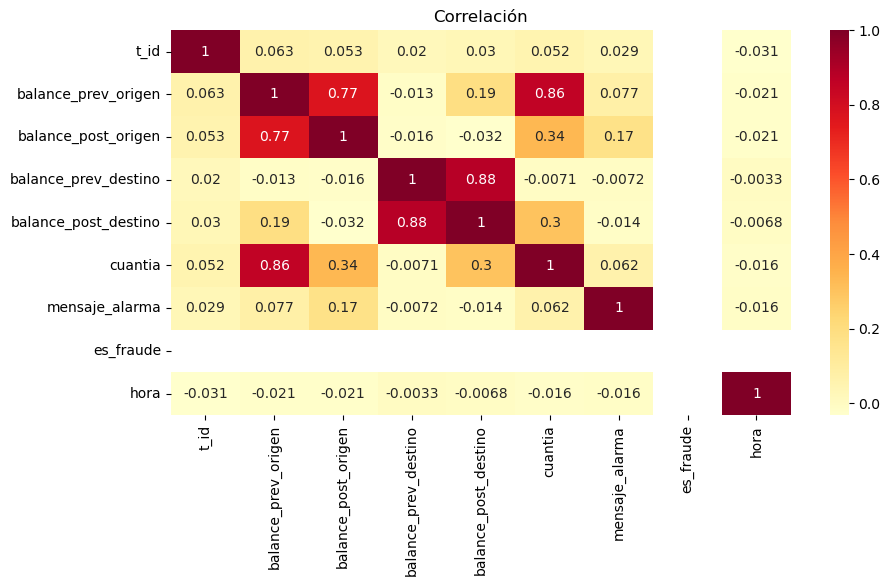

In [48]:
plt.figure(figsize = (10,5))
sns.heatmap(df_fraudes.corr(),annot=True , cmap ='YlOrRd' )
plt.title("Correlación")

Correlaciones por encima del 0.8 son altas e implican una clara correlación entre ambas variables.
En este caso tenemos una correlación de 0.86 entre el balance previo de origen y la cuantia; y una correlacion de 0.88 entre el balance prev y post de destino. 


**Detección de outliers 

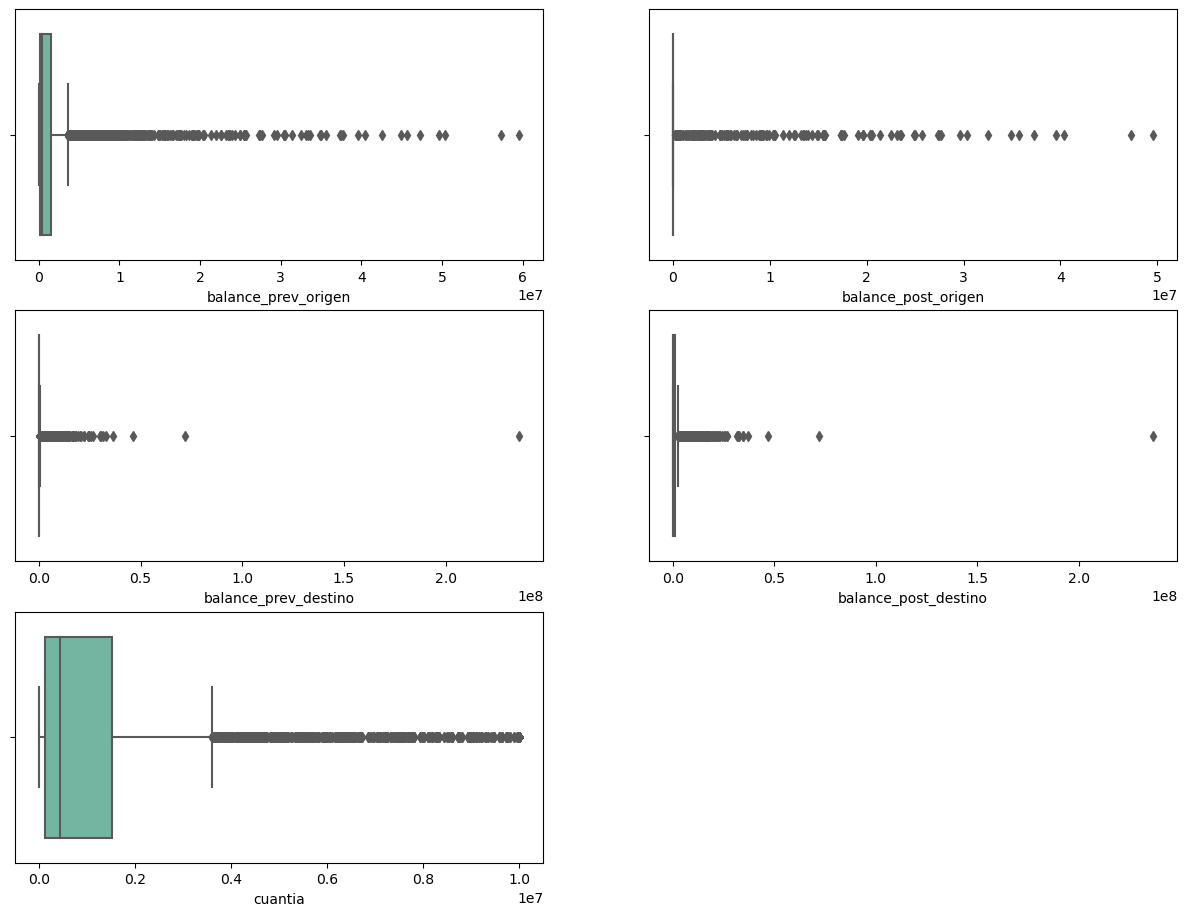

In [50]:
plt.figure(figsize = (15,15))
for i,col in enumerate(['balance_prev_origen', 'balance_post_origen', 'balance_prev_destino', 'balance_post_destino', 'cuantia']):
    plt.subplot(4,2,i+1)
    sns.boxplot(x = col, data = df_fraudes ,palette='Set2')
plt.show()

No vamos a quitar los valores atipicos ya que no existen restricciones en el monto de las cuantias de las operaciones, y tambien nos interesa analizar estos valores en las transacciones fraudulentas. 

## EDA para las transacciones que NO fueron fraude (solo tomaremos CASH_OUT  y TRANSFER, ya que vimos que son el tipo de transacciones que fueron fraude)

In [42]:
filtro = (df['tipo'] == 'TRANSFER')| (df['tipo']  == 'CASH_OUT')

In [43]:
df1 =  df[filtro]

In [46]:
df1.shape

(2762151, 14)

In [52]:
scipy.stats.describe(df1['balance_prev_origen'])

DescribeResult(nobs=2762151, minmax=(0.0, 43818855.3), mean=42879.2777468031, variance=18279285518.92977, skewness=50.264087192449495, kurtosis=11142.145270840118)

In [53]:
scipy.stats.describe(df1['balance_post_origen'])

DescribeResult(nobs=2762151, minmax=(0.0, 43686616.33), mean=15567.45504417029, variance=11366523208.99582, skewness=94.41900165237037, kurtosis=27678.12169159778)

Comparando con las transacciones fraudulentas tenemos una media mucho menor tanto en el balance previo como en el balance post de origen 

In [54]:
scipy.stats.describe(df1['balance_prev_destino'])

DescribeResult(nobs=2762151, minmax=(0.0, 356015889.35), mean=1707006.5124975485, variance=17871507522079.75, skewness=17.12015939283157, kurtosis=666.0708981927626)

In [55]:
scipy.stats.describe(df1['balance_post_destino'])

DescribeResult(nobs=2762151, minmax=(0.0, 356179278.92), mean=2052033.8520441898, variance=21892387277819.137, skewness=16.411809138636496, kurtosis=583.4528377184726)

Comparando con las transacciones fraudulentas tenemos una media y un maximo que se asemejan mas 

In [56]:
scipy.stats.describe(df1['cuantia'])

DescribeResult(nobs=2762151, minmax=(0.01, 92445516.64), mean=314116.61160628445, variance=769392711068.9844, skewness=22.58192619917333, kurtosis=912.3578469308919)

In [ ]:
Comparando con las transacciones fraudulentas tenemos una media mucho menor.

**Calculo de correlación 

Text(0.5, 1.0, 'Correlación')

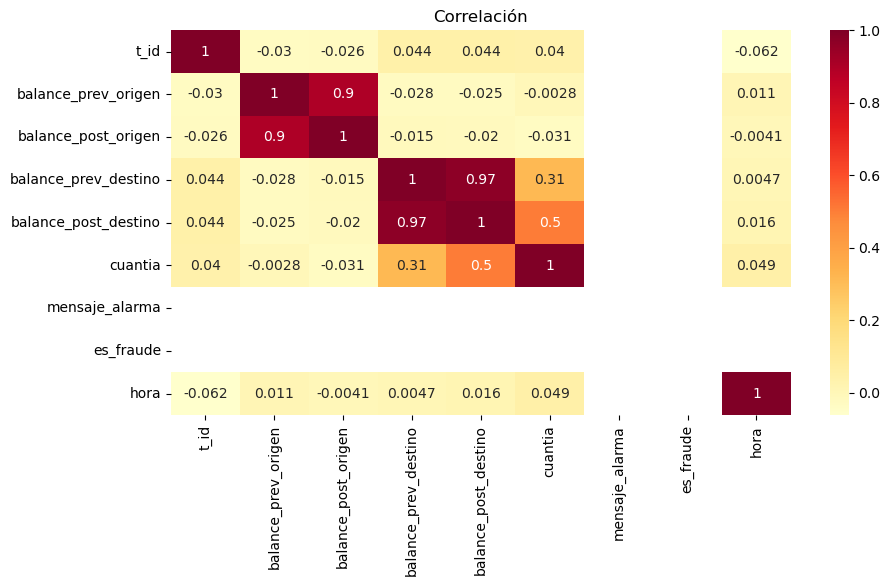

In [57]:
plt.figure(figsize = (10,5))
sns.heatmap(df1.corr(),annot=True , cmap ='YlOrRd' )
plt.title("Correlación")

Correlaciones por encima del 0.8 son altas e implican una clara correlación entre ambas variables.
En este caso tenemos una correlación alta entre el balance previo y post de origen, y el balance previo y post de destino. 

**Detección de outliers

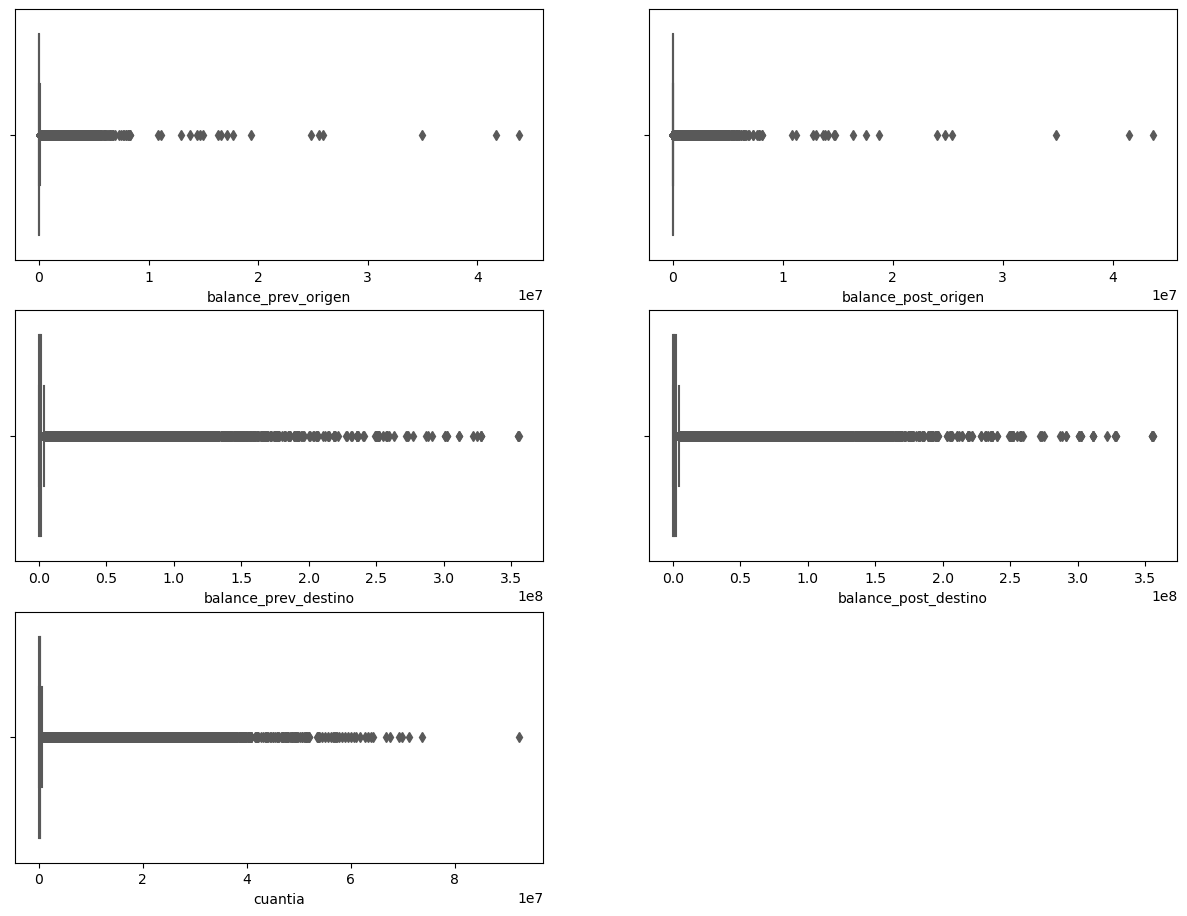

In [58]:
plt.figure(figsize = (15,15))
for i,col in enumerate(['balance_prev_origen', 'balance_post_origen', 'balance_prev_destino', 'balance_post_destino', 'cuantia']):
    plt.subplot(4,2,i+1)
    sns.boxplot(x = col, data = df1 ,palette='Set2')
plt.show()

## Visualización y Analisis de los datos

In [65]:
data_1 = df_fraudes[['fecha','t_id']]

In [74]:
data_2 = data_1[['t_id','fecha']].groupby(by='fecha').count().reset_index()

In [77]:
data_2.sort_values(by="t_id" , ascending=False )

,fecha,t_id
17,2022-09-18,308
3,2022-09-04,304
2,2022-09-03,290
9,2022-09-10,289
11,2022-09-12,286
16,2022-09-17,284
30,2022-10-01,284
6,2022-09-07,284
29,2022-09-30,278
13,2022-09-14,276


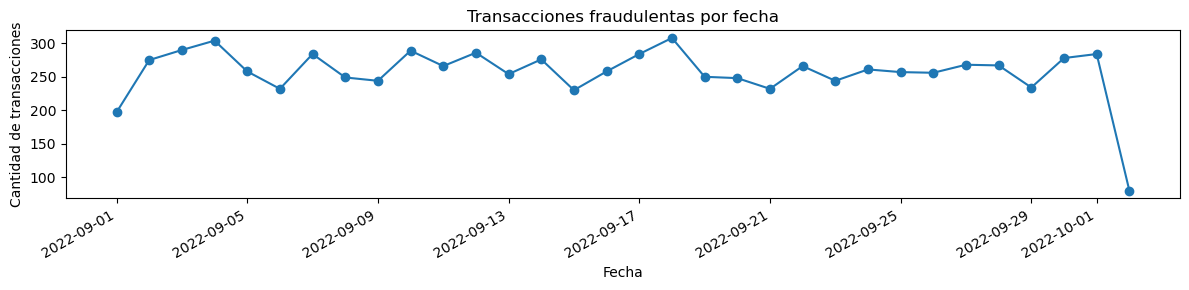

In [67]:
date=data_2['fecha'] 
cantidad=data_2['t_id'] 
plt.subplots(figsize=(12, 3))
plt.plot_date(date,cantidad, linestyle='solid') # Graficar la serie de tiempo
plt.gcf().autofmt_xdate() # Darle formato fecha al eje x
plt.title('Transacciones fraudulentas por fecha')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de transacciones')
plt.tight_layout() # Ajustar los ejes 

plt.show() # mostrar la grafica

La cantidad de fraudes ronda entre los 300 y 200 por dia, no hubo dias especificos donde se produjeron mas fraudes 

In [68]:
data_3 = df_fraudes[['hora','t_id']]

In [69]:
data_4 = data_3[['t_id','hora']].groupby(by='hora').count().reset_index()

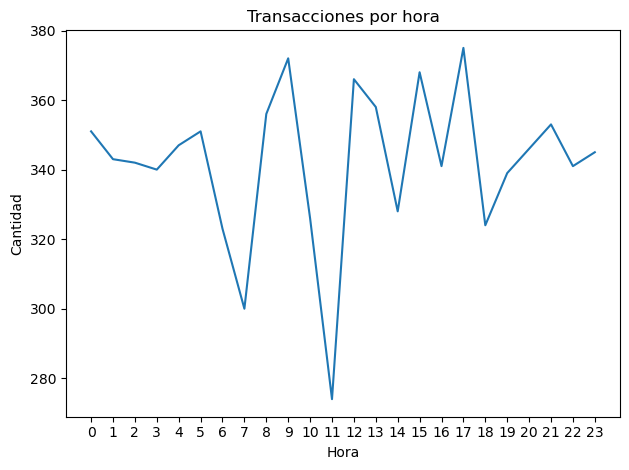

In [71]:
date=data_4['hora'] 
cantidad=data_4['t_id'] 
plt.plot(date,cantidad, linestyle='solid') # Graficar la serie de tiempo
plt.title('Transacciones por hora')
plt.xlabel('Hora')
plt.ylabel('Cantidad')
plt.xticks(range(24))
plt.tight_layout() # Ajustar los ejes 
plt.show() # mostrar la grafica

In [78]:
data_4.sort_values(by="t_id" , ascending=False)

,hora,t_id
17,17,375
9,9,372
15,15,368
12,12,366
13,13,358
8,8,356
21,21,353
0,0,351
5,5,351
4,4,347


In [ ]:
La cantidad de fraudes ronda entre los 300 y 400 por hora, no hubo horas especificas donde se produjeron mas fraudes 

## Identificación de datos erroneos 

• El límite de la retirada en efectivo es de 2000 € al día. • El límite de pago con tarjeta de débito al mes es de 5000 €. • No se pueden producir tres transferencias en una misma hora. • No se pueden producir varias transferencias que juntas sumen más de 3000€ en una misma hora.

## Errores en transacciones que fueron fraude 

In [83]:
df_fraudes.columns

Index(['t_id', 'tipo', 'fecha_final', 'id_cliente_origen',
       'balance_prev_origen', 'balance_post_origen', 'id_cliente_destino',
       'balance_prev_destino', 'balance_post_destino', 'cuantia',
       'mensaje_alarma', 'es_fraude', 'fecha', 'hora'],
      dtype='object')

In [84]:
CASH_OUT = df_fraudes[df_fraudes['tipo'].str.contains("CASH_OUT", case=False)]

In [85]:
CASH_OUT .head(3)

,t_id,tipo,fecha_final,id_cliente_origen,balance_prev_origen,balance_post_origen,id_cliente_destino,balance_prev_destino,balance_post_destino,cuantia,mensaje_alarma,es_fraude,fecha,hora
3,3,CASH_OUT,2022-09-01 08:00:00,C840083671,181.0,0.0,C38997010,21182.0,0.00,181.0,False,True,2022-09-01,8
253,252,CASH_OUT,2022-09-01 08:00:00,C2101527076,2806.0,0.0,C1007251739,26202.0,0.00,2806.0,False,True,2022-09-01,8
683,681,CASH_OUT,2022-09-01 08:00:00,C1118430673,20128.0,0.0,C339924917,6268.0,12145.85,20128.0,False,True,2022-09-01,8


In [86]:
CASH_OUT_1  = CASH_OUT.groupby(['fecha','id_cliente_origen'])['cuantia'].agg(Sum='sum')

In [87]:
CASH_OUT_1.reset_index()

,fecha,id_cliente_origen,Sum
0,2022-09-01,C1002446735,828720.89
1,2022-09-01,C1004271827,25975.86
2,2022-09-01,C1020461364,59835.00
3,2022-09-01,C1034219836,1154353.99
4,2022-09-01,C1055229266,248056.41
...,...,...,...
4109,2022-10-02,C696026207,167606.49
4110,2022-10-02,C786484425,339682.13
4111,2022-10-02,C919525792,323726.61
4112,2022-10-02,C959562247,748139.48


In [88]:
CASH_OUT_2 = CASH_OUT_1[CASH_OUT_1['Sum'] > 2000]

In [89]:
CASH_OUT_2.reset_index()

,fecha,id_cliente_origen,Sum
0,2022-09-01,C1002446735,828720.89
1,2022-09-01,C1004271827,25975.86
2,2022-09-01,C1020461364,59835.00
3,2022-09-01,C1034219836,1154353.99
4,2022-09-01,C1055229266,248056.41
...,...,...,...
4057,2022-10-02,C696026207,167606.49
4058,2022-10-02,C786484425,339682.13
4059,2022-10-02,C919525792,323726.61
4060,2022-10-02,C959562247,748139.48


Hay 4062 clientes que retiraron mas de 2000 Euros al día y cuyas transacciones se marcaron como fraude. 

No existen transacciones del tipo DEBIT que fueron fraudes, por lo tanto, no hay errores en el límite de pago con tarjeta de débito. 

In [90]:
TRANSFER_f = df_fraudes[df_fraudes['tipo'] == 'TRANSFER']

In [91]:
TRANSFER_f1  = TRANSFER_f.groupby(['hora','id_cliente_origen'])['t_id'].agg(Count='count')

In [92]:
TRANSFER_f1.reset_index()

,hora,id_cliente_origen,Count
0,0,C1010536295,1
1,0,C1025625307,1
2,0,C1039450195,1
3,0,C1045717877,1
4,0,C1046272255,1
...,...,...,...
4090,23,C957619820,1
4091,23,C962450896,1
4092,23,C966717890,1
4093,23,C96988544,1


In [93]:
TRANSFER_f2 = TRANSFER_f1[TRANSFER_f1['Count'] > 3]

In [94]:
TRANSFER_f2

,,Count
hora,id_cliente_origen,


No existen errores con respecto a la cantidad de transferencias en una misma hora, para un mismo cliente.

In [95]:
TRANSFER_f3  = TRANSFER_f.groupby(['hora','id_cliente_origen'])['cuantia'].agg(Sum ='sum')

In [96]:
TRANSFER_f3.reset_index()

,hora,id_cliente_origen,Sum
0,0,C1010536295,272776.59
1,0,C1025625307,6174385.48
2,0,C1039450195,1336901.11
3,0,C1045717877,141586.27
4,0,C1046272255,1416055.74
...,...,...,...
4090,23,C957619820,2739869.62
4091,23,C962450896,256705.68
4092,23,C966717890,432544.68
4093,23,C96988544,372703.48


In [97]:
TRANSFER_total_1 = TRANSFER_f3[TRANSFER_f3['Sum'] > 3000]




In [98]:
TRANSFER_total_1.reset_index()

,hora,id_cliente_origen,Sum
0,0,C1010536295,272776.59
1,0,C1025625307,6174385.48
2,0,C1039450195,1336901.11
3,0,C1045717877,141586.27
4,0,C1046272255,1416055.74
...,...,...,...
4041,23,C957619820,2739869.62
4042,23,C962450896,256705.68
4043,23,C966717890,432544.68
4044,23,C96988544,372703.48


Existen 4.046 casos, en los cuales las transacciones juntas suman más de 3000€ en una misma hora, para un mismo cliente, y fueron detectadas como fraude. 

## Errores en transacciones que no fueron fraude 

In [99]:
CASH_OUT_t = df[df['tipo'].str.contains("CASH_OUT", case=False)]

In [100]:
CASH_OUT_t1  = CASH_OUT_t.groupby(['fecha','id_cliente_origen'])['cuantia'].agg(Sum='sum')

In [101]:
CASH_OUT_t1.reset_index()

,fecha,id_cliente_origen,Sum
0,2022-09-01,C1000012640,367527.28
1,2022-09-01,C1000028246,77106.69
2,2022-09-01,C1000053363,84631.88
3,2022-09-01,C100006673,363683.60
4,2022-09-01,C1000093176,5155.13
...,...,...,...
2233269,2022-10-01,C99887357,117228.18
2233270,2022-10-01,C999143091,154502.44
2233271,2022-10-01,C999628527,30075.14
2233272,2022-10-01,C999660189,88845.26


In [102]:
CASH_OUT_t2 = CASH_OUT_t1[CASH_OUT_t1['Sum'] > 2000]

In [103]:
CASH_OUT_t2

Sum
fecha      id_cliente_origen           
2022-09-01 C1000012640        367527.28
           C1000028246         77106.69
           C1000053363         84631.88
           C100006673         363683.60
           C1000093176          5155.13
...                                 ...
2022-10-01 C99887357          117228.18
           C999143091         154502.44
           C999628527          30075.14
           C999660189          88845.26
           C999900236         228224.88

[2218911 rows x 1 columns]

Hay 2.218.911 clientes que retiraron mas de 2000 Euros al día

In [111]:
DEBIT = df[df['tipo'] == 'DEBIT']

In [112]:
DEBIT['mes'] = DEBIT['fecha'].dt.month

In [113]:
DEBIT.head(4)

,t_id,tipo,fecha_final,id_cliente_origen,balance_prev_origen,balance_post_origen,id_cliente_destino,balance_prev_destino,balance_post_destino,cuantia,mensaje_alarma,es_fraude,fecha,hora,mes
9,9,DEBIT,2022-09-01 08:00:00,C712410124,41720.0,36382.23,C195600860,41898.0,40348.79,5337.77,False,False,2022-09-01,8,9
10,10,DEBIT,2022-09-01 08:00:00,C1900366749,4465.0,0.00,C997608398,10845.0,157982.12,9644.94,False,False,2022-09-01,8,9
21,21,DEBIT,2022-09-01 08:00:00,C1566511282,11299.0,1996.21,C1973538135,29832.0,16896.70,9302.79,False,False,2022-09-01,8,9
22,22,DEBIT,2022-09-01 08:00:00,C1959239586,1817.0,751.59,C515132998,10330.0,0.00,1065.41,False,False,2022-09-01,8,9


In [114]:
DEBIT_1  = DEBIT.groupby(['mes','id_cliente_origen'])['cuantia'].agg(Sum='sum')

In [115]:
DEBIT_1.reset_index()

,mes,id_cliente_origen,Sum
0,9,C1000025173,1634.55
1,9,C10001825,2655.04
2,9,C1000190286,3395.56
3,9,C1000196428,2475.71
4,9,C1000209529,308.36
...,...,...,...
41427,10,C806831334,1388.35
41428,10,C839662403,12543.72
41429,10,C953860119,4385.34
41430,10,C960606953,1572.41


In [116]:
DEBIT_2 = DEBIT_1[DEBIT_1['Sum'] > 5000]

In [117]:
DEBIT_2.reset_index()

,mes,id_cliente_origen,Sum
0,9,C1000843295,7029.70
1,9,C1001144039,5194.55
2,9,C1001207714,10943.72
3,9,C1001262306,5634.25
4,9,C100140688,8414.11
...,...,...,...
11844,10,C1942412197,7394.05
11845,10,C2120758488,5676.65
11846,10,C539695306,16887.83
11847,10,C742125659,5711.73


Hay 11.849 clientes que superaron el límite de pago con tarjeta de débito al mes, de 5000 €

In [118]:
TRANSFER = df[df['tipo'] == 'TRANSFER']

In [119]:
TRANSFER_1  = TRANSFER.groupby(['hora','id_cliente_origen'])['t_id'].agg(Count='count')

In [120]:
TRANSFER_1 .reset_index()

,hora,id_cliente_origen,Count
0,0,C1000094846,1
1,0,C1000122340,1
2,0,C1000125588,1
3,0,C1000126591,1
4,0,C1000150723,1
...,...,...,...
528790,23,C999714217,1
528791,23,C999765627,1
528792,23,C999807848,1
528793,23,C999908857,1


In [121]:
TRANSFER_2 = TRANSFER_1[TRANSFER_1['Count'] > 3]

In [122]:
TRANSFER_2

,,Count
hora,id_cliente_origen,


No existen errores con respecto a la cantidad de transferencias en una misma hora, para un mismo cliente. 

In [123]:
TRANSFER_3  = TRANSFER.groupby(['hora','id_cliente_origen'])['cuantia'].agg(Sum ='sum')

In [124]:
TRANSFER_3 .reset_index()

,hora,id_cliente_origen,Sum
0,0,C1000094846,835095.20
1,0,C1000122340,86276.42
2,0,C1000125588,452100.96
3,0,C1000126591,351902.82
4,0,C1000150723,503020.45
...,...,...,...
528790,23,C999714217,10000000.00
528791,23,C999765627,2071088.63
528792,23,C999807848,613007.16
528793,23,C999908857,62146.19


In [125]:
TRANSFER_total_t1 = TRANSFER_3[TRANSFER_3['Sum'] > 3000]

In [126]:
TRANSFER_total_t1.reset_index()

,hora,id_cliente_origen,Sum
0,0,C1000094846,835095.20
1,0,C1000122340,86276.42
2,0,C1000125588,452100.96
3,0,C1000126591,351902.82
4,0,C1000150723,503020.45
...,...,...,...
527021,23,C999714217,10000000.00
527022,23,C999765627,2071088.63
527023,23,C999807848,613007.16
527024,23,C999908857,62146.19


Existen 527.026 casos, en los cuales las transacciones juntas suman más de 3000€ en una misma hora, para un mismo cliente.